In [17]:
# Import libraries
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Download the dataset
od.download(
    "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/")

Skipping, found downloaded files in ".\creditcardfraud" (use force=True to force download)


In [3]:
# Load data into dataframe
df = pd.read_csv("creditcardfraud/creditcard.csv")

In [4]:
# Inspect the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


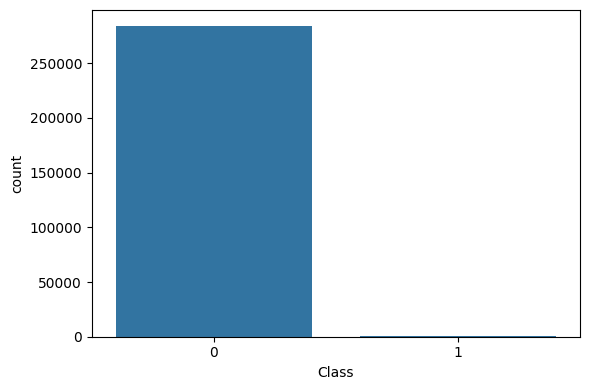

In [9]:
# Visualize the different classes in the dataset
fix, ax = plt.subplots(figsize=(6,4))

ax = sns.countplot(x='Class', data = df)
plt.tight_layout()

In [13]:
# Split the data into training and validation
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [14]:
# Train the model
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14209
           1       0.96      0.78      0.86        32

    accuracy                           1.00     14241
   macro avg       0.98      0.89      0.93     14241
weighted avg       1.00      1.00      1.00     14241



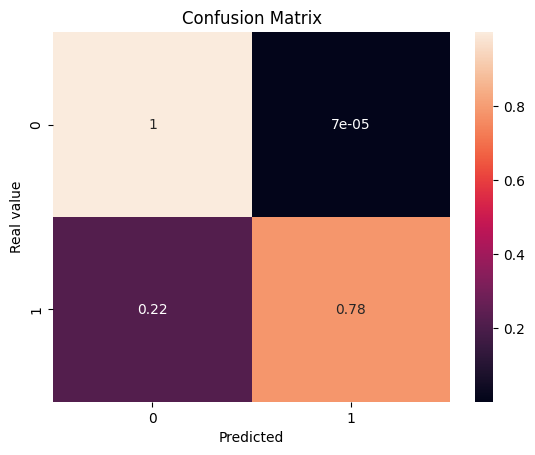

In [20]:
y_pred_tree = model_tree.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred_tree))

# Print confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_tree, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real value")
ax.set_xlabel("Predicted")

plt.show()